In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np

In [3]:
lengths = ["300bp", "3000bp", "30000bp"]
aln_ids = ['200580_114946_573911', '197113_332182_17210', '758_443154_73021', '198257_206396_13724']
names = ["High JSD, Low Entropy", "High JSD, High Entropy", "Low JSD, Low Entropy", "Low JSD, High Entropy"]

In [4]:
names[1]

'High JSD, High Entropy'

In [6]:
figs = {}

for j, aln in enumerate(aln_ids):
    name = names[j]
    fig = make_subplots(
        rows=1, cols=3, 
        x_title="Theoretical Quantiles",
        y_title='Sample Quantiles',

        subplot_titles=("(a)", "(b)", "(c)"),
        shared_yaxes=True,
    )

    for i, l in enumerate(lengths):
        data = pd.read_csv(f"~/repos/results/aim_3/synthetic/eop/{aln}/{l}.tsv", sep="\t")
        p = data.loc[:,'p'].values
        p.sort()

        uniform_data = np.random.uniform(0,1,len(data))
        uniform_data.sort()

        # adding trace for qq, and then the diagonal line
        fig.add_trace(go.Scatter(x=uniform_data, y=p, line={"color": "mediumturquoise"}), row=1, col=i+1)
        fig.add_trace(go.Scatter(y=[0, 1], mode="lines", line={"color": "yellowgreen"}), row=1, col=i+1)
        

    # Update title and height
    fig.update_layout(title_text=f"Adjacent EOP Q-Q plot for Null Dataset {1+j}, (a) alignments of length 300, (b), 3,000 and (c), 30,000", height=400, width=800, showlegend=False)
    
    fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    )
    figs[f"{aln}"]=fig


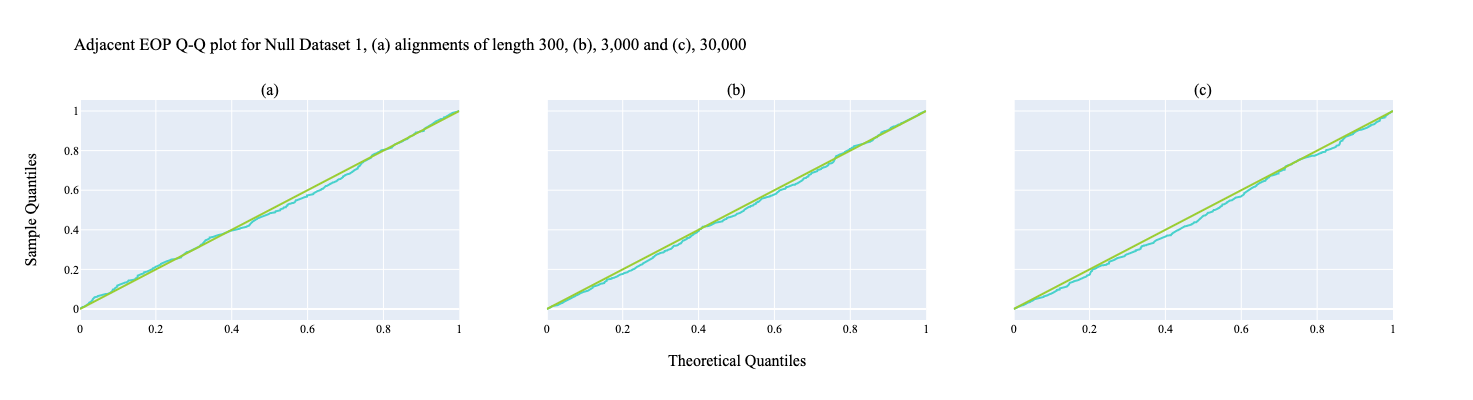

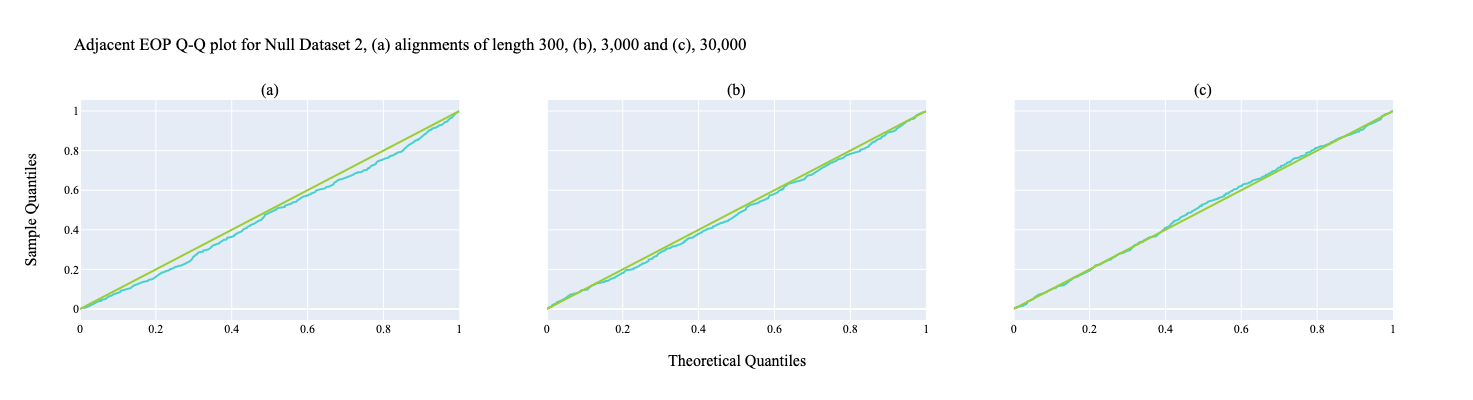

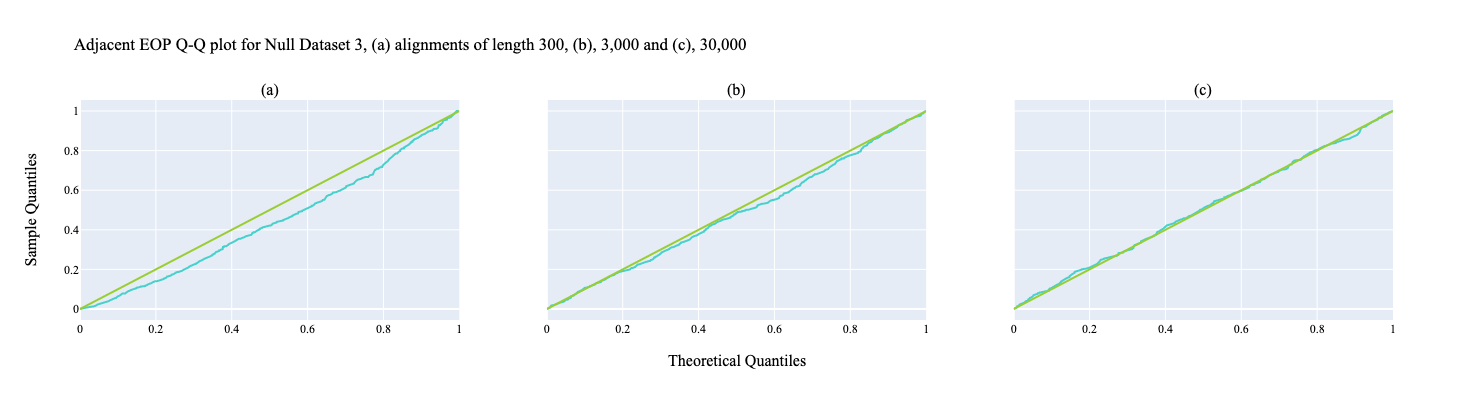

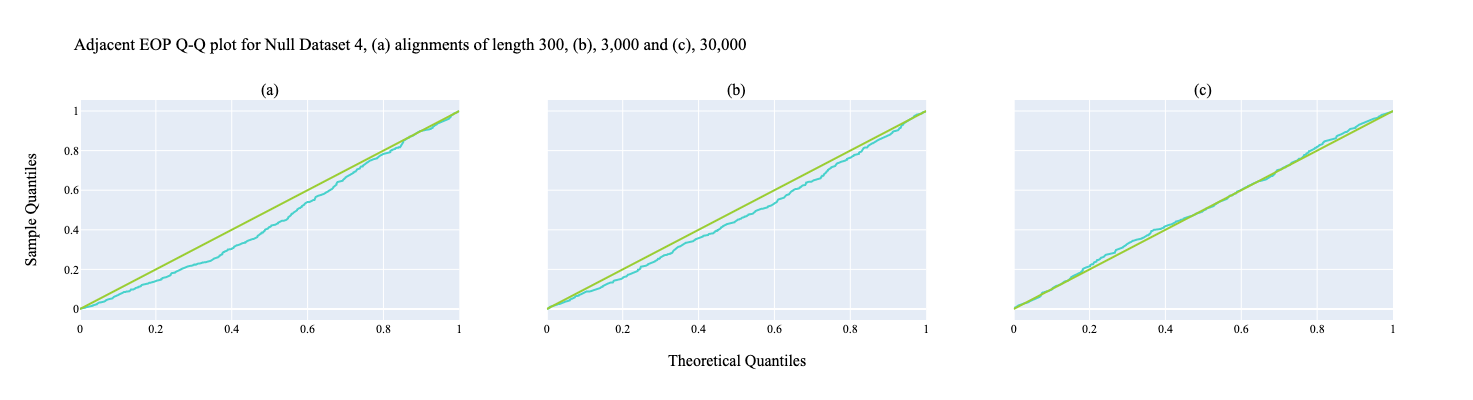

In [10]:
for k, f in figs.items():
    path = f'/Users/katherine/repos/Thesis-Draft-1-KC/figures/plots/synthetic/adj_eop/{k}'
    f.write_image(path + '.pdf')
    with open(path + '.tex','w') as file:
        file.write('\\begin{figure}[h]]\n')
        file.write('\\centering\n')
        file.write('\\includegraphics[width=\textwidth]{' + path + '.pdf}\n')
        file.write('\\caption{}\n')
        file.write('\\label{fig:}\n')
        file.write('\\end{figure}\n')
    f.show()
